Libraries

In [72]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, accuracy_score


import warnings
warnings.filterwarnings('ignore')

Functions

In [93]:
def train_evaluate_model(model_name, model, x_train, y_train, x_test, y_test):
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    
    print(f"Model: {model_name}")
    print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred):.2f}")
    print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_pred):.2f}")
    
    return y_pred

In [74]:
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

Loading data & Preprocessing

In [75]:
df = pd.read_csv(r"C:\Users\JNKV\OneDrive\Desktop\CS\A.I\Course\Data\StudentPerformanceFactors.csv")

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

In [77]:
df.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


In [78]:
df.isna().sum()

Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Motivation_Level               0
Internet_Access                0
Tutoring_Sessions              0
Family_Income                  0
Teacher_Quality               78
School_Type                    0
Peer_Influence                 0
Physical_Activity              0
Learning_Disabilities          0
Parental_Education_Level      90
Distance_from_Home            67
Gender                         0
Exam_Score                     0
dtype: int64

In [79]:
df.Teacher_Quality.value_counts()

Teacher_Quality
Medium    3925
High      1947
Low        657
Name: count, dtype: int64

In [80]:
df.Teacher_Quality.fillna(df.Teacher_Quality.mode()[0], inplace = True)    #fill all the nulls with highest frequency value

In [81]:
df.Parental_Education_Level.value_counts()

Parental_Education_Level
High School     3223
College         1989
Postgraduate    1305
Name: count, dtype: int64

In [82]:
df.Parental_Education_Level.fillna(df.Parental_Education_Level.mode()[0], inplace = True) 

In [83]:
df.Distance_from_Home.value_counts()

Distance_from_Home
Near        3884
Moderate    1998
Far          658
Name: count, dtype: int64

In [84]:
df.Distance_from_Home.fillna(df.Distance_from_Home.mode()[0], inplace = True)

In [85]:
df.isna().sum()

Hours_Studied                 0
Attendance                    0
Parental_Involvement          0
Access_to_Resources           0
Extracurricular_Activities    0
Sleep_Hours                   0
Previous_Scores               0
Motivation_Level              0
Internet_Access               0
Tutoring_Sessions             0
Family_Income                 0
Teacher_Quality               0
School_Type                   0
Peer_Influence                0
Physical_Activity             0
Learning_Disabilities         0
Parental_Education_Level      0
Distance_from_Home            0
Gender                        0
Exam_Score                    0
dtype: int64

<Axes: xlabel='Hours_Studied'>

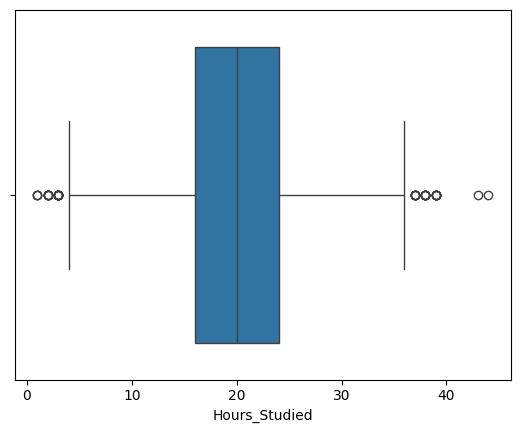

In [86]:
sns.boxplot(x ='Hours_Studied', data = df)

In [87]:
clean_df = remove_outliers(df, 'Hours_Studied')

<Axes: xlabel='Hours_Studied'>

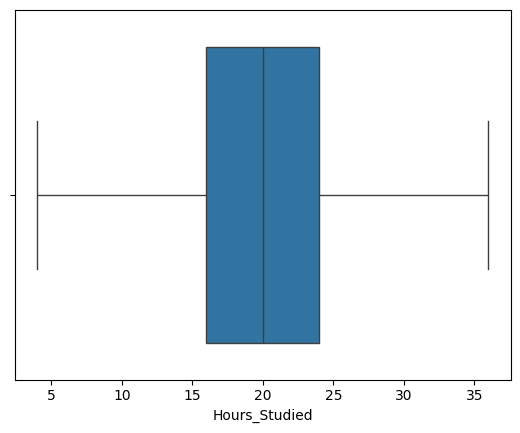

In [88]:
sns.boxplot(x ='Hours_Studied', data = clean_df)

Training and Evaluating Model

In [89]:
x = clean_df[['Hours_Studied']]
y = clean_df['Exam_Score']                  #To predict exam scores only based on study hours

In [90]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [91]:
lr = LinearRegression()

In [94]:
y_pred = train_evaluate_model("Linear Regression", lr, x_train, y_train, x_test, y_test)

Model: Linear Regression
Mean Squared Error: 12.14
Mean Absolute Error: 2.49


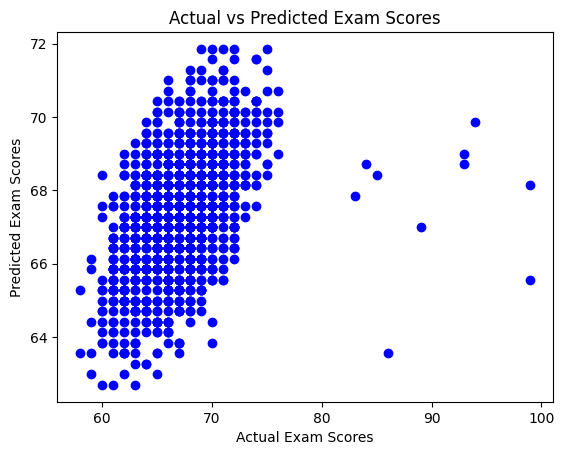

In [95]:
plt.scatter(y_test, y_pred, color = 'blue')
plt.xlabel("Actual Exam Scores")
plt.ylabel("Predicted Exam Scores")
plt.title("Actual vs Predicted Exam Scores")
plt.show()

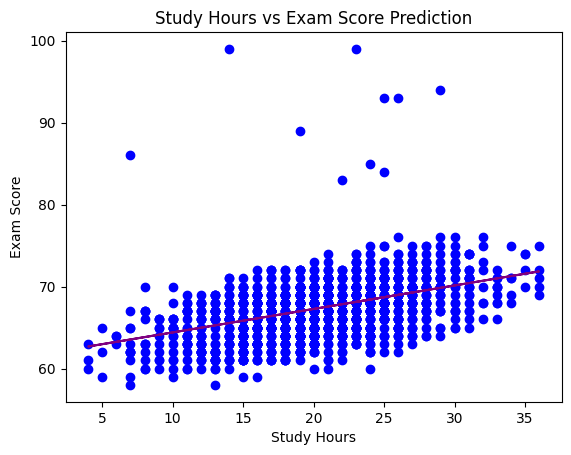

In [96]:
plt.scatter(x_test, y_test, color = 'blue', label='Actual')
plt.plot(x_test, y_pred, color='purple', label='Predicted')
plt.xlabel('Study Hours')
plt.ylabel('Exam Score')
plt.title('Study Hours vs Exam Score Prediction')
plt.show()

Trying different regression model

In [97]:
degree = 3
Poly_model = make_pipeline(PolynomialFeatures(degree), LinearRegression())

In [98]:
y_pred_poly = train_evaluate_model("Polynomial Regression", Poly_model, x_train, y_train, x_test, y_test)

Model: Polynomial Regression
Mean Squared Error: 12.13
Mean Absolute Error: 2.49


In [99]:
x_curve = np.linspace(x.min(), x.max(), 100).reshape(-1, 1)

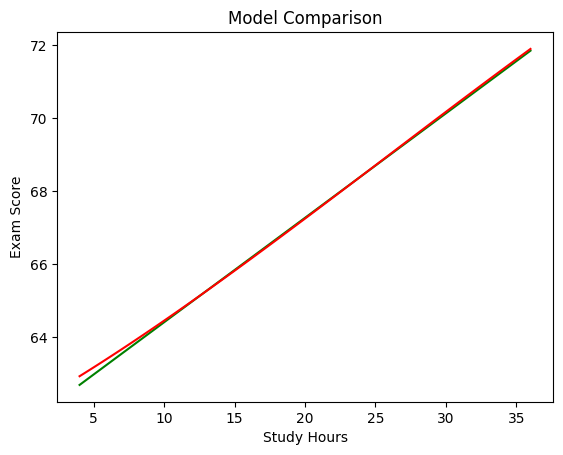

In [100]:
y_pred_linear = lr.predict(x_curve)
plt.plot(x_curve, y_pred_linear, color='green', label='Linear Regression')


y_pred_poly = Poly_model.predict(x_curve)
plt.plot(x_curve, y_pred_poly, color='red', label=f'Polynomial (deg {degree})')    #To check which model fits more using a smooth prediciton line

plt.xlabel('Study Hours')
plt.ylabel('Exam Score')
plt.title('Model Comparison')
plt.show()

Trying to use more features alongside Studying hours

<Axes: xlabel='Sleep_Hours'>

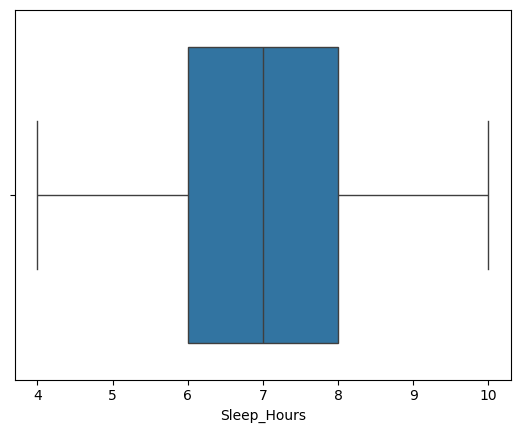

In [ ]:
sns.boxplot(x ='Sleep_Hours', data = df)   #Checking if the added features are clean

<Axes: xlabel='Attendance'>

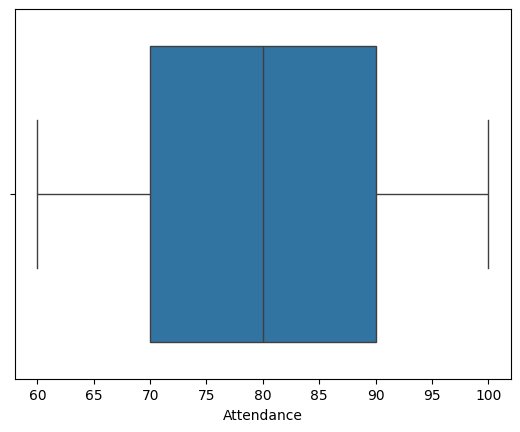

In [111]:
sns.boxplot(x ='Attendance', data = df)

In [105]:
x = clean_df[['Hours_Studied', 'Sleep_Hours', 'Attendance']]
y = clean_df['Exam_Score']               

In [106]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [107]:
y_pred = train_evaluate_model("Linear Regression", lr, x_train, y_train, x_test, y_test)

Model: Linear Regression
Mean Squared Error: 7.67
Mean Absolute Error: 1.57


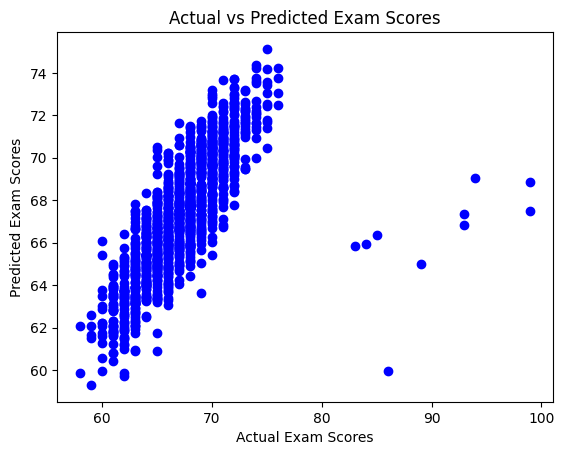

In [109]:
plt.scatter(y_test, y_pred, color = 'blue')
plt.xlabel("Actual Exam Scores")
plt.ylabel("Predicted Exam Scores")
plt.title("Actual vs Predicted Exam Scores")
plt.show()

Using more features decreased the error metrics, indicating a better fit with more features.